<a href="https://colab.research.google.com/github/kzukeri/portfolio/blob/main/Kweli-Final-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Research Questions
1. Which food products have the highest total greenhouse gas emissions per kilogram of product, and what stages contribute most to those emissions?
2. How significant is the processing and transport stage in the total emissions of different crops? Are there food products where the emissions of post-farm stages outweigh farm-stage level emissions? [Create a meta-variable for farm-state and post-farm emissions]
3. How do plant-based and animal-based food products compare in terms of environmental impact? [multiple DVs]



#Problem Statement

The globalized "modern" large-scale food production system is doing great harm to the natural world, the atmosphere, and to the health and well-being of life on Earth. While the exalted lofty goals of neoliberal global food chains benefit the wealthiest populations of the globe, predominantly residing in the global North, by making many non-local foods available year-round, it is at the expense of transporation-related pollutants. Additionally, "modern" large-scale monoculture agricultural practices that involve machine-tilling and  emit vast amounts of carbon and GHG, which is helping fuel a climate change that affects global majority (non-white) people the hardest. By understanding which parts of the food production system are most harmful is an important steps in shaping policy to change those systems in ways that reduce their harm, as well as ultimately creates systems to support local, regenerative farming practices that help sequestor GHG, and thus help reverse climate change. This study expects that anmimal-based food products will be overall larger contributors to environmental harm, as well as seeks to examine which parts of the food production process are most harmful.

#Data Dimensions & Scales
##Variables
Food product (Categorical name of food)

Type  (Binary categorical: (1) planted-based or (2) animal-based)

Land use change (Kg CO2 emission / kg product)

Animal feed (Kg CO2 emission / kg product)

Farm (Kg CO2 emission / kg product)

Processing (Kg CO2 emission / kg product)

Transport (Kg CO2 emission / kg product)

Packaging (Kg CO2 emission / kg product)

Retail (Kg CO2 emission / kg product)

Total emissions (Kg CO2 emission / kg product)

Eutrophying emissions per 1000 kcal (gPO₄eq per 1000 kcal)

Eutrophying emissions per kilogram (gPO₄eq per kilogram)

Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)

Freshwater withdrawals per 1000 kcal (liters per 1000 kcal)

Freshwater withdrawals per 100g protein (liters per 100g protein)

Freshwater withdrawals per kilogram (liters per kilogram)

Greenhouse gas emissions per 1000 kcal (kgCO₂eq per 1000 kcal)

Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)

Land use per 1000 kcal (m² per 1000 kcal)

Land use per kilogram (m² per kilogram)

Land use per 100g protein (m² per 100g protein)

Scarcity-weighted water use per kilogram (liters per kilogram)

Scarcity-weighted water use per 100g protein (liters per 100g protein)

Scarcity-weighted water use per 1000 kcal (liters per 1000 kilocalories)

##Related Definitions & Notes
Greenhouse gas emissions are measured in kilograms of carbon dioxide-equivalents. This means non-CO₂ gases are weighted by theamount of warming they cause over a 100-year timescale.

Scarcity-weighted water use represents freshwater use weighted by local water scarcity.This is measured in liters per kilogram of food product.

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

kcal = 1 calorie of macronutrient

Land use change: A process by which human activities transform the natural landscape, referring to how land has been used, usually emphasizing the functional role of land for economic activities. Land use changes are often nonlinear and might trigger feedbacks to the system, stress living conditions, and threaten people with vulnerability (Science Direct Dictionary: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/land-use-change)

##Summary of  the data

## Data Definition

**Environmental Impacts of Food Production** <br>
Source: ourworldindata.org

Contains the 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

**Source**<br>
Hannah Ritchie, Pablo Rosado, and Max Roser (2022) - “Environmental Impacts of Food Production” Published online at OurWorldinData.org. Retrieved from: 'https://ourworldindata.org/environmental-impacts-of-food

**Original Data Source**
Crippa, M., Solazzo, E., Guizzardi, D., Monforti-Ferrario, F., Tubiello, F. N., & Leip, A. J. N. F. (2021). Food systems are responsible for a third of global anthropogenic GHG emissions. Nature Food, 2(3), 198-209 (Source of the dataset in this article)

**Context** <br>
As the world’s population has expanded and gotten richer, the demand for food, energy and water has seen a rapid increase. Not only has demand for all three increased, but they are also strongly interlinked: food production requires water and energy; traditional energy production demands water resources; agriculture provides a potential energy source. This article focuses on the environmental impacts of food. Ensuring everyone in the world has access to a nutritious diet in a sustainable way is one of the greatest challenges we face.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Read the dataset
food_data = pd.read_excel('/content/drive/MyDrive/Data Science Bootcamp/Final Project/Food_Production_Impact_Full.xlsx')

# Create the Dataframe
FoodDataFrame = pd.DataFrame(food_data)

In [80]:
FoodDataFrame.head(7)

,Food product,Type,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),plant-based,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),plant-based,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),plant-based,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,plant-based,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,plant-based,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,plant-based,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
6,Cassava,plant-based,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN


In [81]:
FoodDataFrame.tail(7)

,Food product,Type,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
36,Pig Meat,animal-based,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,31.958159,76.38,47.206428,751.380753,1109.888752,1795.8,5.150628,7.608158,7.263598,17.36,10.729295,66867.4,41327.194070,27977.99163
37,Poultry Meat,animal-based,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.324324,48.70,28.117783,356.756757,381.062356,660.0,5.335135,5.698614,6.605405,12.22,7.055427,14177.9,8185.854503,7663.72973
38,Milk,animal-based,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,10.65,32.272727,1047.000000,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.484850,32977.16667
39,Cheese,animal-based,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.974640,46731.42119
40,Eggs,animal-based,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,21.76,19.610671,401.180556,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.470800,12487.98611
41,Fish (farmed),animal-based,0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,235.12,103.100197,2062.178771,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.423370,23224.69274
42,Shrimps (farmed),animal-based,0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
FoodDataFrame.shape
rows=len(FoodDataFrame.axes[0])
columns=len(FoodDataFrame.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", columns)

Number of Rows:  43
Number of Columns:  24


In [83]:
FoodDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Type                                                                     43 non-null     object 
 2   Land use change (KgCO2/Kg)                                               43 non-null     float64
 3   Animal Feed (KgCO2/Kg)                                                   43 non-null     float64
 4   Farm (KgCO2/Kg)                                                          43 non-null     float64
 5   Processing (KgCO2/Kg)                                                    43 non-null     float64
 6   Transport (KgCO2/Kg)                                                     43 

In [84]:
#Calcuate total null values

initial_null_values=FoodDataFrame.isnull().sum().sum()
print(initial_null_values)

158


In [85]:
#Calculate null values per column
FoodDataFrame.isnull().sum()

,0
Food product,0
Type,0
Land use change (KgCO2/Kg),0
Animal Feed (KgCO2/Kg),0
Farm (KgCO2/Kg),0
Processing (KgCO2/Kg),0
Transport (KgCO2/Kg),0
Packaging (KgCO2/Kg),0
Retail (KgCO2/Kg),0
Total_emissions (KgCO2/Kg),0


In [86]:
total_values=rows*columns
print(total_values)
percentage_null_values=(initial_null_values/total_values)*100


1032


In [87]:
#Return the percentage of null values with hundredths decimal place

print("The portion of null values is " , percentage_null_values.round(2) , "%")

The portion of null values is  15.31 %


In [88]:
#Return the columns in this dataframe that have 2 (8.5%) or more missing values
#Note: Typically less than five percent missing values may not affect the results. More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

missing_values = FoodDataFrame.isnull().sum()
columns_with_missing_values = missing_values[missing_values >= 2].index.tolist()
columns_with_missing_values


['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
 'Freshwater withdrawals per 100g protein (liters per 100g protein)',
 'Freshwater withdrawals per kilogram (liters per kilogram)',
 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
 'Land use per 1000kcal (m² per 1000kcal)',
 'Land use per kilogram (m² per kilogram)',
 'Land use per 100g protein (m² per 100g protein)',
 'Scarcity-weighted water use per kilogram (liters per kilogram)',
 'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

In [89]:
number_variables_greater_than_85=len(columns_with_missing_values)
print(number_variables_greater_than_85)
#Return the number of columns with more than 2 missing values

14


In [90]:
#Create a new data frame for data adjustments
FoodDataFrame2 = pd.DataFrame(food_data)
FoodDataFrame2.head(7)

,Food product,Type,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),plant-based,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),plant-based,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),plant-based,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,plant-based,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,plant-based,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,plant-based,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
6,Cassava,plant-based,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN


#Understanding the data
There are 43 instances (rows), and 24 dimensions (columns). I added one category of info to the dataset, which is a binary categorical variable of "type. A value of 1 is planted-based and a value of 2 is animal-based. All of the variables are float 64 except for the name of the food product which is a string data type. There are a total of 158 null values out of a total of 989 possible total values, which equates to 15.31% missing data. Of the 23 variables, there are 14 that are missing >8.5% of data across all of the instances. All of the variables that capture carbon emissions (KgCO2/Kg) for parts of the food production process, as well as the aggregate carbon emissions (KgCO2/Kg) are complete (i.e. no missing values).

The other types of variables, which are eutrophying emissions across 3 types of scales, freshwater withdrawal across 3 types of scales, GHG emission across 2 types of scales, land use across 3 types of scales, and scarcity-weighted water use across 3 types of scales, are all missing significant amounts of values. The other scales represented within these variables measure aspects of environmental cost in terms of overall caloric value (per 1000kcal), protein value (per 100 grams protein), and overall product yield value (per kg of product.

One missing contextual element of this data is the difference between regenerative agricultural practices, which generally have a much smaller carbon footprint, and in fact often have a positive impact on the environment by seuestering carbon and nitrogen rather than releasing it, and practices that are destructive, such as monoculture, lack of crop rotation, use of chemical pesticides and fertilizer, and machine tilling. For the farming portion of the food production process, application of regenerative practices would lessen impact. The creators of the dataset acknowledge that there is large diversity of agricultural emissions, "in particular, beef, lamb, and dairy ...depending on how and where they’re produced." However, this is not nuance is not captured in the dataset. It would be very useful to collect data for both regenerative practices and for "conventional" practices to understand the difference , and thus, understand the value in investing in switching to regenertive practices.

One aspect of the dataset that I don't understand is for "land use change" emissions, how several food products have negative values entered; most notably for groudnuts at -2.1. This would suggest that the practices used to grow them are regenerative, as it relates to use of the land, and therefore sequestor carbon, unless they are mistakes in the dataset.

##Feature Additions
Create a meta-variable for average farm-stage and post-farm emissions
Create Farm (3): Land-use change + Farming + Animal feed; Create
Post farm processing (4): Processing + Transport + Packaging + Retail. Also, remove all variables that are missing 2 or more values.




In [91]:
#Drop the 14 columns in FoodDataFrame2 that have more than 2 missing values

#Identify columns to drop
columns_to_drop = missing_values[missing_values > 2].index.tolist()
FoodDataFrame2 = FoodDataFrame2.drop(columns=columns_to_drop)

# Verify the changes
print(FoodDataFrame2.shape)
print(FoodDataFrame2.isnull().sum())

(43, 10)
Food product                  0
Type                          0
Land use change (KgCO2/Kg)    0
Animal Feed (KgCO2/Kg)        0
Farm (KgCO2/Kg)               0
Processing (KgCO2/Kg)         0
Transport (KgCO2/Kg)          0
Packaging (KgCO2/Kg)          0
Retail (KgCO2/Kg)             0
Total_emissions (KgCO2/Kg)    0
dtype: int64


In [92]:
#Add 2 columns for 2 aggregate variables: One for farm_emissions (3 variables) and one for post_farm_emissions (4 variables)

FoodDataFrame2['Farm Emissions (KgCO2/Kg)'] = (FoodDataFrame2['Land use change (KgCO2/Kg)'] + FoodDataFrame2['Animal Feed (KgCO2/Kg)'] + FoodDataFrame2['Farm (KgCO2/Kg)'])
FoodDataFrame2['Post Farm Emissions (KgCO2/Kg)'] = (FoodDataFrame2['Processing (KgCO2/Kg)'] + FoodDataFrame2['Transport (KgCO2/Kg)'] + FoodDataFrame2['Packaging (KgCO2/Kg)'] + FoodDataFrame2['Retail (KgCO2/Kg)'])

# Display the first few rows with the new columns
display(FoodDataFrame2.head(50))

,Food product,Type,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Farm Emissions (KgCO2/Kg),Post Farm Emissions (KgCO2/Kg)
0,Wheat & Rye (Bread),plant-based,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,0.9,0.5
1,Maize (Meal),plant-based,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,0.8,0.3
2,Barley (Beer),plant-based,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,0.2,0.9
3,Oatmeal,plant-based,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,1.4,0.2
4,Rice,plant-based,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,3.6,0.4
5,Potatoes,plant-based,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,0.2,0.1
6,Cassava,plant-based,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.8,0.1
7,Cane Sugar,plant-based,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,1.7,0.9
8,Beet Sugar,plant-based,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,0.5,0.9
9,Other Pulses,plant-based,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,1.1,0.5


After dropping variables that were above the 17% missing data threshold, as well as creating and adding the two new aggregate variables, we can see the new dataframe to confirm.

#Descriptive Stats

In [93]:
FoodDataFrame2.describe()

,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Farm Emissions (KgCO2/Kg),Post Farm Emissions (KgCO2/Kg)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,5.183721,0.788372
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,10.099739,0.692892
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,0.400000,0.200000
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,1.400000,0.600000
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,4.750000,1.150000
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,57.600000,2.400000


In [99]:
#For Type, return count that have plant-based and animal-based

type_counts = FoodDataFrame2['Type'].value_counts()

# Print the counts for each value
print("Count of Type = plant-based:", type_counts.get('plant-based', 0))
print("Count of Type = animal-based:", type_counts.get('animal-based', 0))

Count of Type = plant-based: 33
Count of Type = animal-based: 10


#Observations of Descriptive Stats

There are some significant outliers within the data, as indicated by the fact that the max for several of them are so much bigger than the media/mean and even many standard deviations away. For example, for Total_emissions, while the mean is 5.98 KgCO2/Kg, the max is 59.6 KgCO2/Kg! A quick glance at the dataset makes clear that this is not a mistake - animal and dairy food production is clearly significantly higher than others and represents these outliers. Also, there are more plant-based food products (33) vs. animal-based (10)

In [100]:
#Select only the numerical columns for correlation analysis
numerical_cols = FoodDataFrame2.select_dtypes(include=np.number).columns

#Calculate the correlation matrix
correlation_matrix = FoodDataFrame2[numerical_cols].corr()

#Display the correlation matrix
correlation_matrix

,Land use change (KgCO2/Kg),Animal Feed (KgCO2/Kg),Farm (KgCO2/Kg),Processing (KgCO2/Kg),Transport (KgCO2/Kg),Packaging (KgCO2/Kg),Retail (KgCO2/Kg),Total_emissions (KgCO2/Kg),Farm Emissions (KgCO2/Kg),Post Farm Emissions (KgCO2/Kg)
Land use change (KgCO2/Kg),1.000000,0.243624,0.646480,0.466434,0.052339,0.169467,0.182538,0.801875,0.808027,0.375585
Animal Feed (KgCO2/Kg),0.243624,1.000000,0.572698,0.426774,0.231742,-0.032542,0.514322,0.574677,0.573658,0.348289
Farm (KgCO2/Kg),0.646480,0.572698,1.000000,0.704444,0.233778,0.156483,0.389291,0.969024,0.968381,0.571595
Processing (KgCO2/Kg),0.466434,0.426774,0.704444,1.000000,0.338420,0.397291,0.428702,0.719673,0.687960,0.879808
Transport (KgCO2/Kg),0.052339,0.231742,0.233778,0.338420,1.000000,0.084875,-0.008222,0.224505,0.202448,0.451762
Packaging (KgCO2/Kg),0.169467,-0.032542,0.156483,0.397291,0.084875,1.000000,0.013043,0.205018,0.163125,0.729594
Retail (KgCO2/Kg),0.182538,0.514322,0.389291,0.428702,-0.008222,0.013043,1.000000,0.391958,0.380518,0.394165
Total_emissions (KgCO2/Kg),0.801875,0.574677,0.969024,0.719673,0.224505,0.205018,0.391958,1.000000,0.998499,0.602082
Farm Emissions (KgCO2/Kg),0.808027,0.573658,0.968381,0.687960,0.202448,0.163125,0.380518,0.998499,1.000000,0.557442
Post Farm Emissions (KgCO2/Kg),0.375585,0.348289,0.571595,0.879808,0.451762,0.729594,0.394165,0.602082,0.557442,1.000000


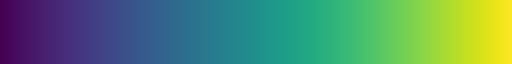

In [ ]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

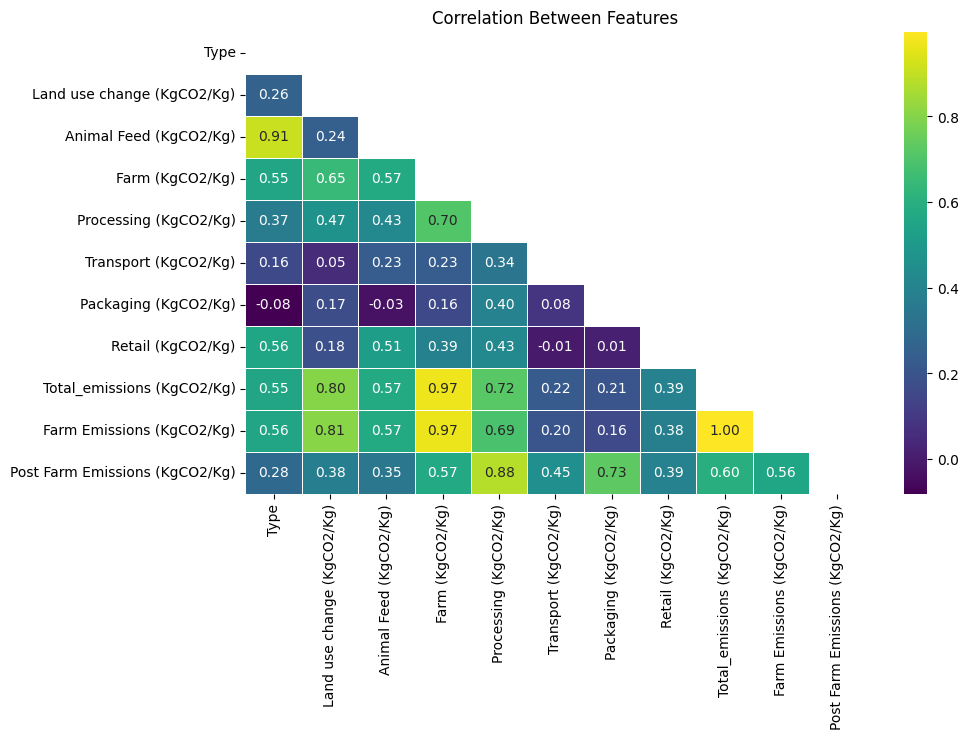

In [58]:
# To get a correlation matrix
# Ploting the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

# Create the plot
plt.figure(figsize=(10,6))
matrix = correlation_matrix
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(correlation_matrix,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()

#Correlation Matrix Observations
Being that all of the numerical data in the dataset represent emissions and 3 of those variables represent aggregates of the emissions variables, the correlation matrix is less helpful than it may have been in there was other data related to each food product. However, looking at correlations that are not aggregate variables be helpful in understanding if there is a relationship between one part of the food production process being related to other parts of the food production process in terms of emissions. For example, "Farm" emissions and "Processing" emissions have a high correalted at 0.70. Although I cannot tell here whether or not this is statistically significant without a Pearson coefficient, it suggests that products with high Farm emission are more likely to have a high Processing emission.

In [59]:
# Set Plotly themes
# Javascript Interactive Visualization (computationally expensive)
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [60]:
# Set Bokeh themes
# bokeh.palettes.Viridis256
import bokeh as bk
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import Scatter, ColumnDataSource, Div, RangeSlider, Spinner, CustomJS
# apply theme to current document
curdoc().theme = 'light_minimal'

#Adjusted Research Questions
1. Which food products have the highest total greenhouse gas emissions per kilogram of product? [[Plot a bar chart for total emissions]]

2. How significant is the processing and transport stage in the total emissions of different crops? Are there food products where the emissions of post-farm stages outweigh farm-stage level emissions? [[For each food product, chart both pre and post-farm bars]]

3. How do plant-based and animal-based food products compare in terms of environmental impact?


In [62]:
# Create visualization to show Totl Carbon Emissions for Different Food Products
fig  = px.scatter(FoodDataFrame2,x='Food product',
                  y = 'Total_emissions (KgCO2/Kg)',
                  title = 'Total Carbon Emissions for Different Food Products',
                  #color = VariableVariationByColor.index
                  )
fig.show()

In [63]:
# Create visualization for Farm-based Carbon Emissions for Different Food Products
fig  = px.scatter(FoodDataFrame2,x='Food product',
                  y = 'Farm Emissions (KgCO2/Kg)',
                  title = 'Farm-based Carbon Emissions for Different Food Products',
                  #color = VariableVariationByColor.index
                  )
fig.show()

In [122]:
# Create visualization for Post-Farm-based Carbon Emissions for Different Food Products
fig  = px.scatter(FoodDataFrame2,x='Food product',
                  y = 'Post Farm Emissions (KgCO2/Kg)',
                  title = 'Post-Farm-based Carbon Emissions for Different Food Products',
                  #color = VariableVariationByColor.index
                  labels={'Food product': 'Food Product', 'Post Farm Emissions (KgCO2/Kg)': 'Post Farm Emissions (KgCO2/Kg)'}
                  )


fig.show()

In [101]:
# Create visualization for total Carbon Emissions for Plant-based vs. Animal-based
fig  = px.scatter(FoodDataFrame2,x='Type',
                  y = 'Total_emissions (KgCO2/Kg)',
                  title = 'Total Carbon Emissions for Plant-based vs. Animal-based',
                  #color = VariableVariationByColor.index
                  )
fig.show()

In [102]:
#Return an average aggregate variable for plant-based food products for post-farm emissions and return an average aggregate variable for animal-based food products for post-farm emissions

# Separate plant-based and animal-based dataframes
plant_based_df = FoodDataFrame2[FoodDataFrame2['Type'] == 'plant-based'].copy()
animal_based_df = FoodDataFrame2[FoodDataFrame2['Type'] == 'animal-based'].copy()

# Calculate the average post-farm emissions for plant-based products
average_plant_based_post_farm = plant_based_df['Post Farm Emissions (KgCO2/Kg)'].mean()

# Calculate the average post-farm emissions for animal-based products
average_animal_based_post_farm = animal_based_df['Post Farm Emissions (KgCO2/Kg)'].mean()

print(f"Average post-farm emissions for plant-based products: {average_plant_based_post_farm:.2f} KgCO2/Kg")
print(f"Average post-farm emissions for animal-based products: {average_animal_based_post_farm:.2f} KgCO2/Kg")

Average post-farm emissions for plant-based products: 0.68 KgCO2/Kg
Average post-farm emissions for animal-based products: 1.14 KgCO2/Kg


In [104]:
#Return an average aggregate variable for plant-based food products for post-farm emissions and return an average aggregate variable for animal-based food products for post-farm emissions

# Separate plant-based and animal-based dataframes
plant_based_df = FoodDataFrame2[FoodDataFrame2['Type'] == 'plant-based'].copy()
animal_based_df = FoodDataFrame2[FoodDataFrame2['Type'] == 'animal-based'].copy()

# Calculate the average post-farm emissions for plant-based products
average_plant_based_farm = plant_based_df['Farm Emissions (KgCO2/Kg)'].mean()

# Calculate the average post-farm emissions for animal-based products
average_animal_based_farm = animal_based_df['Farm Emissions (KgCO2/Kg)'].mean()

print(f"Average farm emissions for plant-based products: {average_plant_based_farm:.2f} KgCO2/Kg")
print(f"Average farm emissions for animal-based products: {average_animal_based_farm:.2f} KgCO2/Kg")

Average farm emissions for plant-based products: 2.13 KgCO2/Kg
Average farm emissions for animal-based products: 15.25 KgCO2/Kg


#Research Questions Explorations
1. Which food products have the highest total greenhouse gas emissions per kilogram of product? [[Plot a bar chart for total emissions]]

2. How significant is the processing and transport stage in the total emissions of different crops? Are there food products where the emissions of post-farm stages outweigh farm-stage level emissions? [[For each food product, chart both pre and post-farm bars]]

3. How do plant-based and animal-based food products compare in terms of environmental impact?

##Resources and References

##Peer-Reviewed Journal Research
Crippa, M., Solazzo, E., Guizzardi, D., Monforti-Ferrario, F., Tubiello, F. N., & Leip, A. J. N. F. (2021). Food systems are responsible for a third of global anthropogenic GHG emissions. Nature Food, 2(3), 198-209 (Source of the dataset in this article)

Clark, Michael A., Nina GG Domingo, Kimberly Colgan, Sumil K. Thakrar, David Tilman, John Lynch, Inês L. Azevedo, and Jason D. Hill. “Global food system emissions could preclude achieving the 1.5° and 2° C climate change targets.” Science, 370, no. 6517 (2020): 705-708.

## Non-Profit Organizations and Non-Governmental Organizations
Report: "Food production is responsible for one-quarter of the world’s greenhouse gas emissions"
https://ourworldindata.org/food-ghg-emissions
Excerpt: "Crop production accounts for 27% of food emissions...21% of food’s emissions comes from crop production for direct human consumption, and 6% comes from the production of animal feed. They are the direct emissions which result from agricultural production – this includes elements such as the release of **nitrous oxide from the application of fertilizers and manure; methane emissions from rice production; and carbon dioxide from agricultural machinery.**"

Report: Cultivating Climate Resilience on Farms and Ranches. Sustainable Agriculture Research and Education (SARE).

## Federal, State, Local Government


##Book Chapters
*Resilient Agriculture: Cultivating Food Systems for a Changing Climate* by Laura Lengnick.

Introduction. *Farming While Black: Soul Fire Farm's Practical Guide to Liberation on the Land* by Leah Penniman (2018).

Chapter 7: Tools & Technology. *Farming While Black: Soul Fire Farm's Practical Guide to Liberation on the Land* by Leah Penniman (2018).